# Titanic Survival Prediction


## 1. Import Libraries and Load Data

First, let's import the necessary libraries and load our training and testing datasets.

First lets import the data

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [20]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## 2. Exploratory Data Analysis (EDA)

Now, let's explore the data to understand its structure, find patterns, and identify missing values.

🔍 Aperçu du dataset


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



📦 Dimensions : (891, 12)

📉 Pourcentage de valeurs manquantes :


Cabin       77.104377
Age         19.865320
Embarked     0.224467
dtype: float64

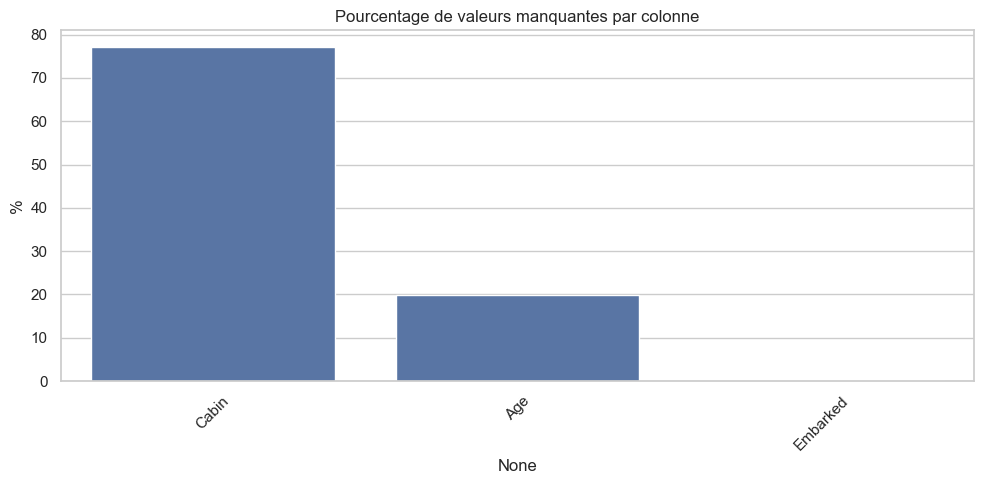


🧼 Colonnes à surveiller pour le nettoyage :
- Age: 177 valeurs manquantes
- Cabin: 687 valeurs manquantes
- Embarked: 2 valeurs manquantes
- Fare: 0 valeurs manquantes


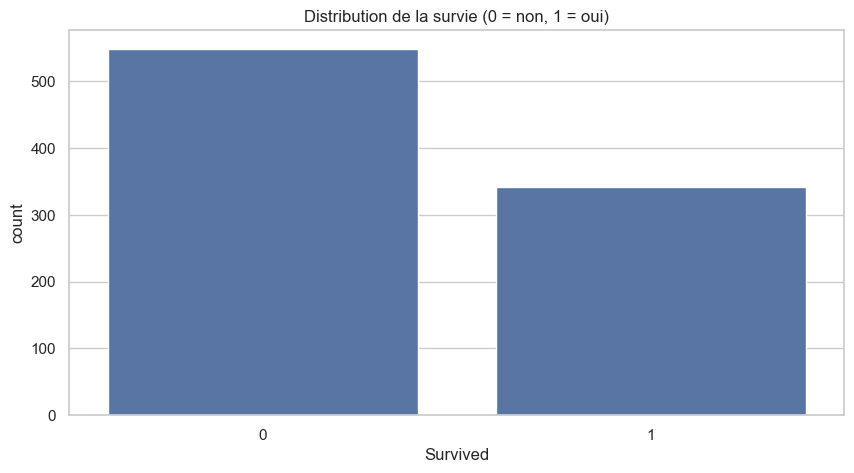

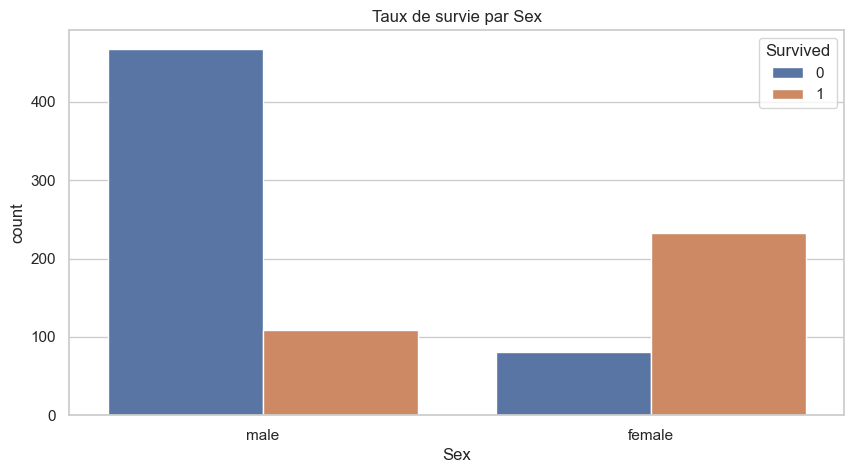

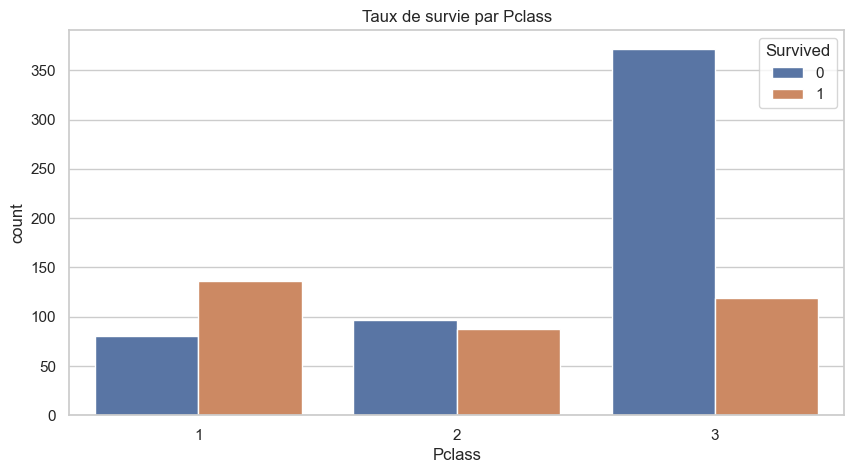

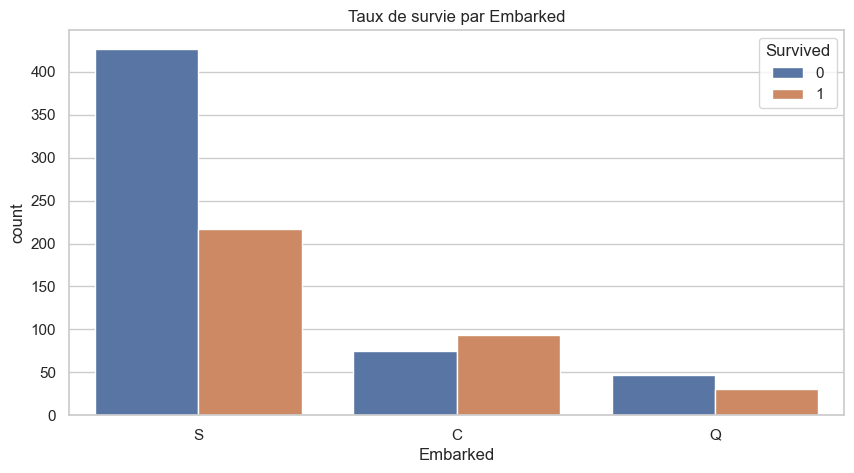

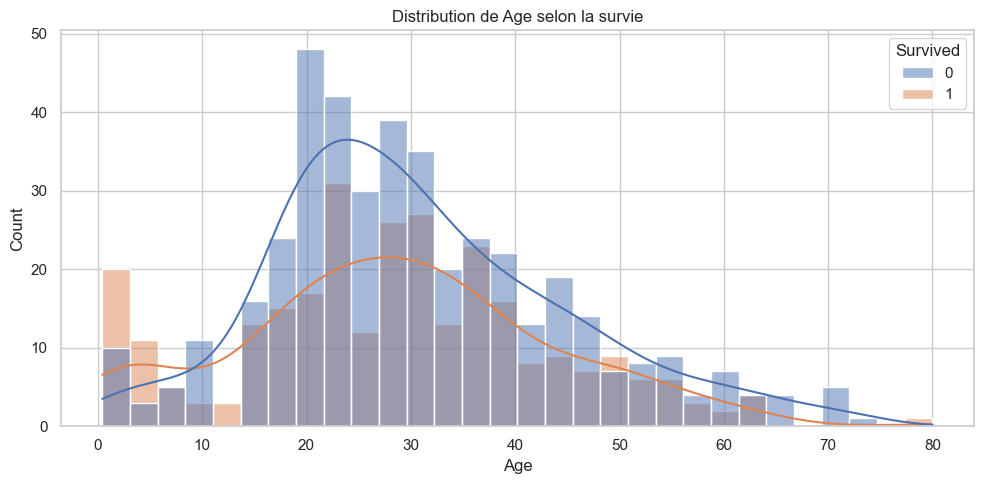

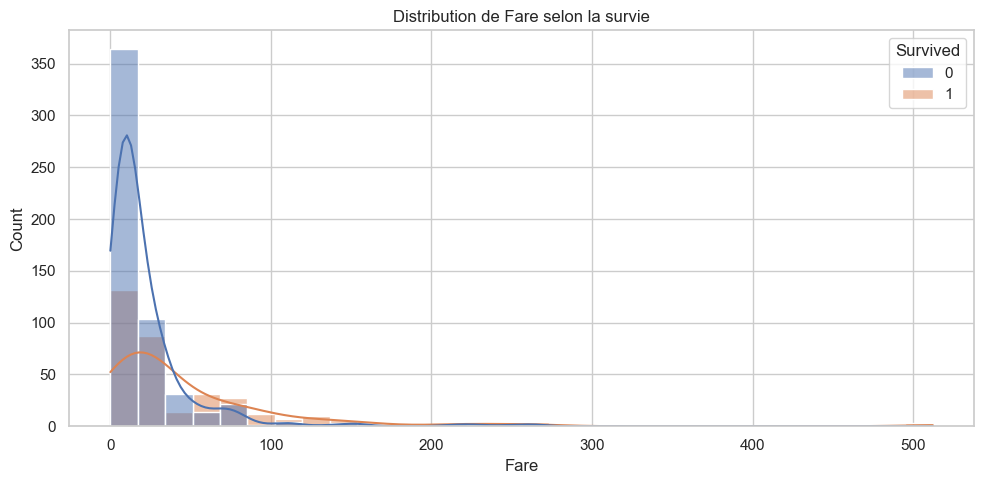

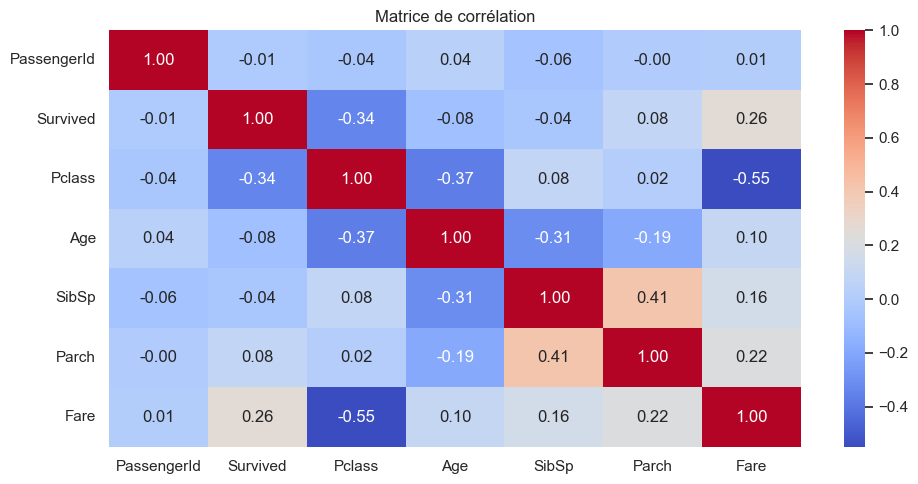


🎩 Aperçu des titres extraits du nom :
Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration esthétique
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# Aperçu général
print("🔍 Aperçu du dataset")
display(train.head())
print("\n📦 Dimensions :", train.shape)

# 1. ✅ Vérification des valeurs manquantes
missing = train.isnull().mean().sort_values(ascending=False) * 100
missing = missing[missing > 0]
print("\n📉 Pourcentage de valeurs manquantes :")
display(missing)

sns.barplot(x=missing.index, y=missing.values)
plt.xticks(rotation=45)
plt.title("Pourcentage de valeurs manquantes par colonne")
plt.ylabel("%")
plt.tight_layout()
plt.show()

# 2. 🧼 Colonnes à nettoyer ou transformer
print("\n🧼 Colonnes à surveiller pour le nettoyage :")
for col in ["Age", "Cabin", "Embarked", "Fare"]:
    print(f"- {col}: {train[col].isnull().sum()} valeurs manquantes")

# 3. 🎯 Distribution de la cible
sns.countplot(x="Survived", data=train)
plt.title("Distribution de la survie (0 = non, 1 = oui)")
plt.show()

# 4. 📊 Variables catégorielles utiles
cat_cols = ["Sex", "Pclass", "Embarked"]
for col in cat_cols:
    sns.countplot(x=col, hue="Survived", data=train)
    plt.title(f"Taux de survie par {col}")
    plt.show()

# 5. 📈 Variables numériques utiles
num_cols = ["Age", "Fare"]
for col in num_cols:
    sns.histplot(data=train, x=col, hue="Survived", bins=30, kde=True)
    plt.title(f"Distribution de {col} selon la survie")
    plt.tight_layout()
    plt.show()

# 6. 🧠 Corrélation entre variables numériques
corr = train.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.show()

# 7. 🧪 Aperçu des titres dans les noms (feature potentielle)
train["Title"] = train["Name"].str.extract(",\s*([^\.]*)\.", expand=False)
print("\n🎩 Aperçu des titres extraits du nom :")
print(train["Title"].value_counts())


In [22]:
print("Null values per column:")
print(train.isnull().sum())

Null values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64


C:\Users\gabri\AppData\Local\Temp\ipykernel_13580\2278045888.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=train, ci=None, palette='viridis')
C:\Users\gabri\AppData\Local\Temp\ipykernel_13580\2278045888.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=train, ci=None, palette='viridis')


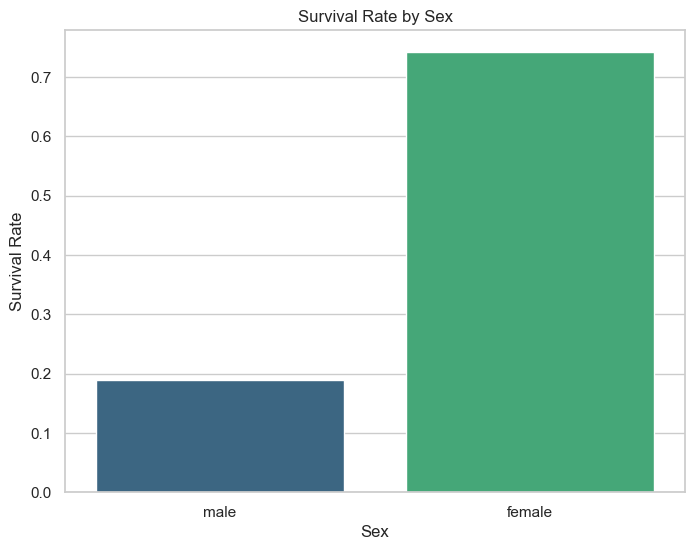

In [23]:

survival_by_sex = train.groupby('Sex')['Survived'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=train, ci=None, palette='viridis')
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.show()

C:\Users\gabri\AppData\Local\Temp\ipykernel_13580\1728266354.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age_group = train.groupby('AgeGroup')['Survived'].mean()
C:\Users\gabri\AppData\Local\Temp\ipykernel_13580\1728266354.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='AgeGroup', y='Survived', data=train, ci=None, order=['Baby', 'Child', 'Teenager', 'Adult', 'OldAdult', 'Old'], palette='viridis')
C:\Users\gabri\AppData\Local\Temp\ipykernel_13580\1728266354.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeGroup', y='Survived', data=train, ci=None, order=

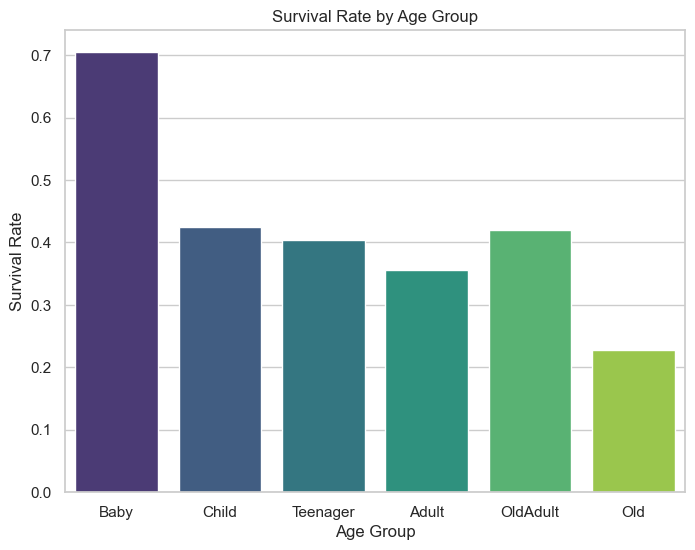

In [24]:
train['AgeGroup'] = pd.cut(train['Age'], bins=[0, 5, 14, 18, 30, 60, 100], labels=['Baby', 'Child', 'Teenager', 'Adult', 'OldAdult', 'Old'])
survival_by_age_group = train.groupby('AgeGroup')['Survived'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x='AgeGroup', y='Survived', data=train, ci=None, order=['Baby', 'Child', 'Teenager', 'Adult', 'OldAdult', 'Old'], palette='viridis')
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.xlabel('Age Group')
plt.show()


C:\Users\gabri\AppData\Local\Temp\ipykernel_13580\370848873.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=train, palette='viridis')


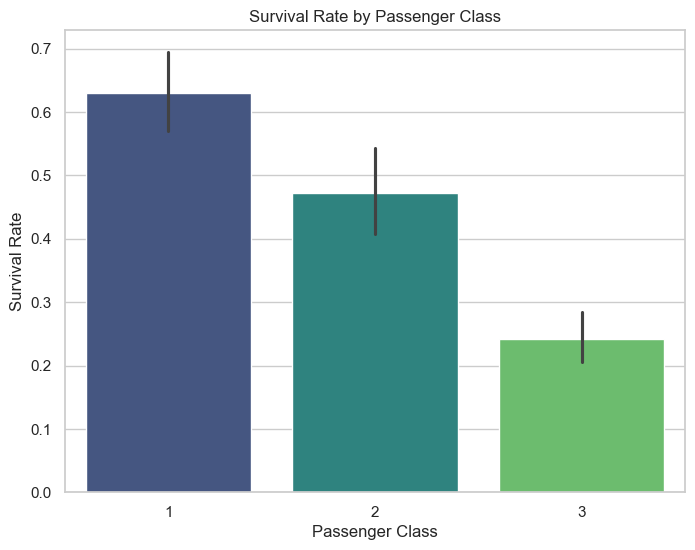

In [25]:
survival_by_pclass = train.groupby('Pclass')['Survived'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=train, palette='viridis')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

C:\Users\gabri\AppData\Local\Temp\ipykernel_13580\2437795068.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_fare = train.groupby('FareClass')['Survived'].mean()
C:\Users\gabri\AppData\Local\Temp\ipykernel_13580\2437795068.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='FareClass', y='Survived', data=train, ci=None, order=['Very Low', 'Low', 'Moderate', 'Medium', 'High', 'Very High', 'Luxury'], palette='viridis')
C:\Users\gabri\AppData\Local\Temp\ipykernel_13580\2437795068.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FareClass', y='Survived', data=train, ci

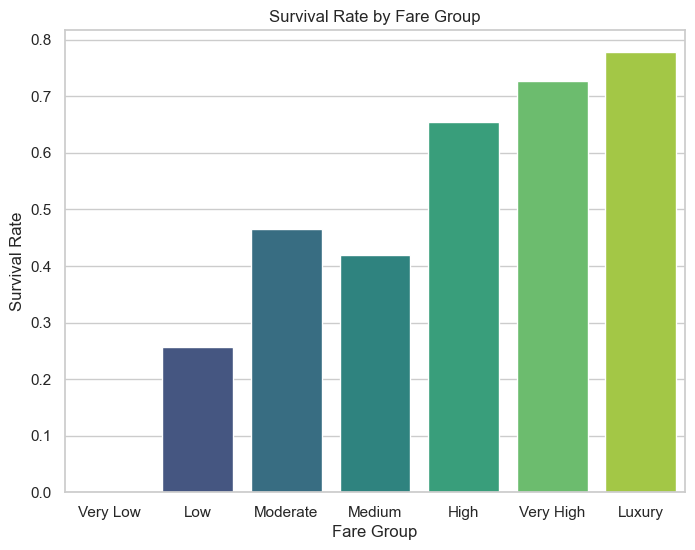

In [26]:
train = pd.read_csv('data/train.csv')

train['FareClass'] = pd.cut(train['Fare'], bins= [0, 5, 15, 25, 50, 100, 250, float('inf')],
                         labels=['Very Low', 'Low', 'Moderate', 'Medium', 'High', 'Very High', 'Luxury'])
survival_by_fare = train.groupby('FareClass')['Survived'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x='FareClass', y='Survived', data=train, ci=None, order=['Very Low', 'Low', 'Moderate', 'Medium', 'High', 'Very High', 'Luxury'], palette='viridis')
plt.title('Survival Rate by Fare Group')
plt.ylabel('Survival Rate')
plt.xlabel('Fare Group')
plt.show()

## 3. Data Cleaning & Feature Engineering

Based on our EDA, we'll clean the data by handling missing values and create new features to improve our model's performance.

In [27]:
# Your data cleaning and feature engineering code here.
# Examples:
# - Handle missing 'Age' values
# - Convert 'Sex' to numerical values
# - Create a 'FamilySize' feature

In [28]:

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

def pre(df):

    df['Family'] = df['Parch'] + df['SibSp']
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 
                                       'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')

    # Fill missing embarked with the most frequent value
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

    # Fill missing fare with the median
    df['Fare'].fillna(df['Fare'].median(), inplace=True)

    # Create fare classes
    df['Very Low'] = (df['Fare'] <= 4)
    df['Low'] = (df['Fare'] > 4) & (df['Fare'] <= 15)
    df['Moderate'] = (df['Fare'] > 15) & (df['Fare'] <= 25)
    df['Medium'] = (df['Fare'] > 25) & (df['Fare'] <= 50)
    df['High'] = (df['Fare'] > 50) & (df['Fare'] <= 100)
    df['Very High'] = (df['Fare'] > 100) & (df['Fare'] <= 250)
    df['Luxury'] = (df['Fare'] > 250)

    # Convert cabin to first letter and fill missing values with 'N'
    df['Cabin'] = df['Cabin'].fillna('N').map(lambda x: x[0])
    
    # Fill missing age with the median or using KNN Imputer
    age_imputer = KNNImputer(n_neighbors=5)
    df['Age'] = age_imputer.fit_transform(df[['Age']])
    
    # Create age categories
    df['Baby'] = (df['Age'] <= 5)
    df['Child'] = (df['Age'] > 5) & (df['Age'] <= 14)
    df['Teenager'] = (df['Age'] > 14) & (df['Age'] <= 18)
    df['Adult'] = (df['Age'] > 18) & (df['Age'] <= 30)
    df['OldAdult'] = (df['Age'] > 30) & (df['Age'] <= 60)
    df['Old'] = (df['Age'] > 60)
    df['Alone'] = df['Family'] == 0
    
    # One-hot encoding
    df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Title', 'Cabin'], drop_first=True)
    #in case there is a cabin that was not mentioned, create it and fill it with False
    for l in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']:
        col = f'Cabin_{l}'
        if col not in df.columns:
            df[col] = pd.Series([False]*df.shape[0])
            df[col].fillna(False, inplace=True)
    
    # Select relevant columns
    cols = ['Age', 'Fare', 'Family', 'Parch', 'SibSp', 'Alone', 'Pclass', 'Very Low', 'Low', 'Moderate', 'Medium',
       'High', 'Very High', 'Luxury', 'Baby', 'Child', 'Teenager',
       'Adult', 'OldAdult', 'Old', 'Sex_male',
       'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Rare', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Cabin_T'] #Cabin_N was ignored
    df2 = df[cols].copy()
    
    # Scale numeric features
    numeric_features = ['Age', 'Fare', 'Parch', 'SibSp']
    scaler = StandardScaler()
    df2[numeric_features] = scaler.fit_transform(df2[numeric_features])
    
    return df2


## 4. Model Training and Evaluation

It's time to choose a model, train it on our processed data, and see how well it performs.

In [29]:
# Your model training code here.
# Examples:
# - from sklearn.model_selection import train_test_split
# - from sklearn.linear_model import LogisticRegression
# - Define features (X) and target (y)
# - Split data, train model, check accuracy

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

train = pd.read_csv('data/train.csv')

train_processed = pre(train)

X = train_processed
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


C:\Users\gabri\AppData\Local\Temp\ipykernel_13580\2831764171.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
C:\Users\gabri\AppData\Local\Temp\ipykernel_13580\2831764171.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

#### Final model : 

In [31]:
rf_model = RandomForestClassifier(
    n_estimators=110,
    max_depth=12,
    min_samples_split=8,
    min_samples_leaf=1,
    max_features=0.15,
    random_state=900,
    bootstrap=True
) 
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy


0.770949720670391

## 5. Create Submission File

Finally, we'll use our trained model to make predictions on the test set and generate the submission file in the required format.

In [32]:
# Your submission generation code here.
# - Process the test_df in the same way as train_df
# - model.predict(X_test)
# - Create a submission DataFrame and save to 'submission.csv'

In [33]:
train = pd.read_csv('data/train.csv')

train_processed = pre(train)

X = train_processed
y = train['Survived']

test = pd.read_csv('data/test.csv')

test_processed = pre(test)

ids = test['PassengerId']
X_t = test_processed

C:\Users\gabri\AppData\Local\Temp\ipykernel_13580\2831764171.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
C:\Users\gabri\AppData\Local\Temp\ipykernel_13580\2831764171.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

C:\Users\gabri\AppData\Local\Temp\ipykernel_13580\2831764171.py:52: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(False, inplace=True)
C:\Users\gabri\AppData\Local\Temp\ipykernel_13580\2831764171.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

In [34]:
rf_model.fit(X, y)
preds = rf_model.predict(X_t)
ids = test['PassengerId']
PredictionDF = pd.DataFrame({'PassengerId' : ids, 'Survived' : preds})
PredictionDF.to_csv('submissions.csv', index=False)

